In [47]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

# Example binary classification
Last time we worked in a multiclass classification problem. Today, we will review the concepts in an 'easier' classification example.

We will implement all concepts learnt until now using tensorflow framework and binary classification problem. Later on, we will start introducing optimization concepts.

The idea of this notebook is to provide a recipe-like appproach while creating your neural network. However, remember that working with Neural Networks require constant iterations, and the steps taken to tackle certain problem don't necessarily apply to a different one.

First let us create the datasets.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets 
#from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
    return X, Y

N = 400
noisy_circles = sklearn.datasets.make_circles(n_samples=N, factor=.5, noise=.3)
noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=.2)
blobs = sklearn.datasets.make_blobs(n_samples=N, random_state=5, n_features=2, centers=6)
gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean=None, cov=0.5, n_samples=N, n_features=2, n_classes=2, shuffle=True, random_state=None)
no_structure = np.random.rand(N, 2), np.random.rand(N, 2)

## Dataset
the fist step is to load the dataset

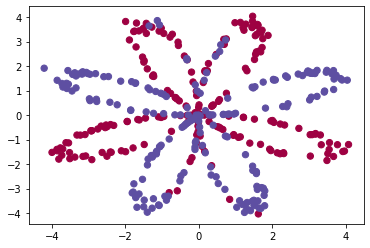

In [49]:
#X, Y = noisy_moons
X, Y = load_planar_dataset()

plt.scatter(X[:,0], X[:,1], c=[Y] ,s=40, cmap=plt.cm.Spectral);


In [50]:
# check the data
print("The shape of X is: ", X.shape)
print("The shape of Y is: ", Y.shape)
print("There are m = %d training examples" %(Y.shape[0]))


The shape of X is:  (400, 2)
The shape of Y is:  (400, 1)
There are m = 400 training examples


In [51]:
# print the first 5 observations  
print(X[0:5,:])
print(Y[0:5])

[[ 1.20444229  3.57611415]
 [ 0.1587099  -1.4821709 ]
 [ 0.0952472  -1.27995533]
 [ 0.34917847 -2.06437997]
 [ 0.69415038  2.88910878]]
[[0]
 [0]
 [0]
 [0]
 [0]]


In [52]:
# Generate train and dev/test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2)

In [53]:
# check the train and dev/test sets
print("The shape of x_train ", x_train.shape)
print("The shape of x_test ", x_test.shape)

The shape of x_train  (320, 2)
The shape of x_test  (80, 2)


### Model 1: Hidden Layer: 1, Learning Rate: 0.01, Epoch: 200

In [54]:
# create the model baseline
def create_baseline(n_h = 4, lr = 0.01):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers
    
    
    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model    

In [55]:
model = create_baseline()
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [56]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)

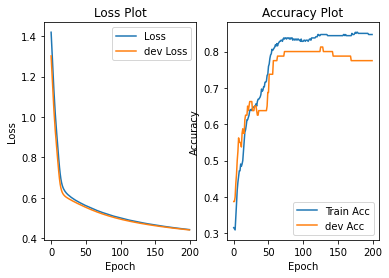

In [57]:
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()


plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

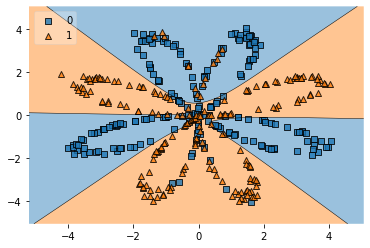

In [58]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y[:,0], clf=model, legend=2)
plt.show()

In [59]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score1 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score1)

[[39  3]
 [15 23]]
Overall Accuracy: 0.775


# Optimizing Neural networks

Until now we have learned that there are parameters in our model: 
    
    - The Weights and Bias  of each layer.

And we also have hyperparameters (which have an effect on your parameters):
    
    - Learning rate $\eta$
    - No. iterations (epochs)
    - No. of Hidden units
    - No. of Layers
    - Selection of activation function
    - Regularization techniques
    - ...
    
Try re-running the previous example and investigate what happens when you change when you change:
    
    - No. iterations: 100, 500, 1000, 2000
    - No. Hidden units: 1, 2, 3, 4, 5, 10, 50
    - Change the learning rate
    - What happens if you change the activation function?
    - try adding new Layers

How to select what kind of tunnning does our model might need?
    
    1) Plot the training error and the dev/test error.
    2) Take a look at the Bias and Variance of the results
    3) Does your model have high bias?
        - Train a bigger network (more layers)
        - Train longer (more epochs)
        - Change the network architechture
    4) Does your model have high variance?
        - Get more data
        - Apply regulatization
        - Change the architechture

## By changing Epoch 

### Model 2: Epoch: 100

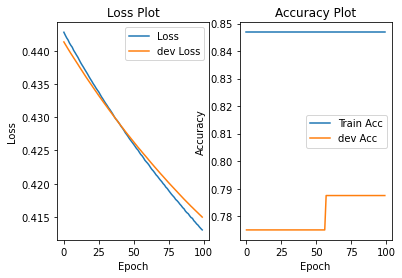

In [60]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 100, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

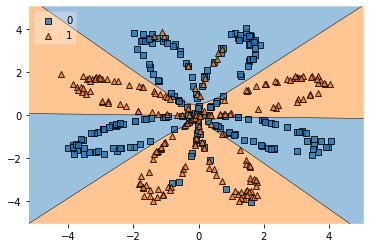

In [61]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y[:,0], clf=model, legend=2)
plt.show()

In [62]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score2 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score2)

[[41  1]
 [16 22]]
Overall Accuracy: 0.7875


### Model 3: Epoch: 500

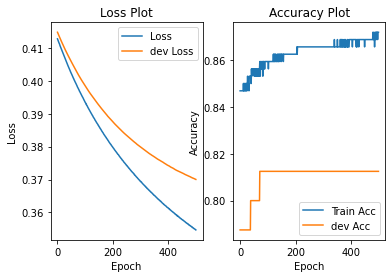

In [63]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 500, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

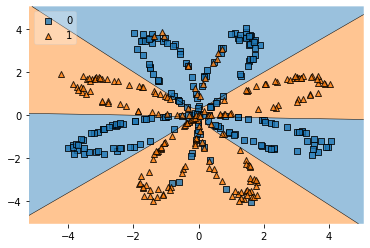

In [64]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y[:,0], clf=model, legend=2)
plt.show()

In [65]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score3 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score3)

[[41  1]
 [14 24]]
Overall Accuracy: 0.8125


### Model 4: Epoch: 1000

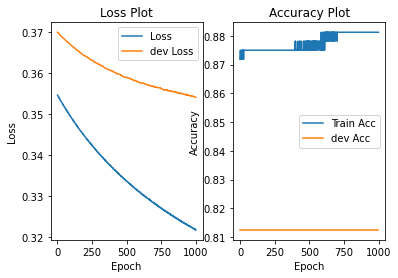

In [66]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 1000, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

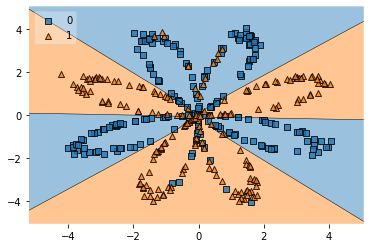

In [67]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y[:,0], clf=model, legend=2)
plt.show()

In [68]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score4 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score4)

[[41  1]
 [14 24]]
Overall Accuracy: 0.8125


### Model 5: Epoch: 2000

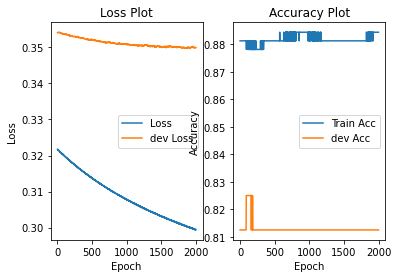

In [69]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 2000, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

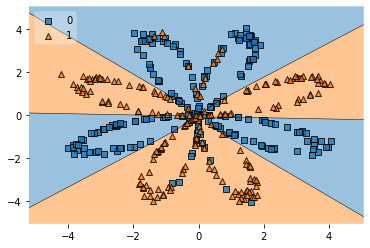

In [70]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y[:,0], clf=model, legend=2)
plt.show()

In [71]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score5 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score5)

[[41  1]
 [14 24]]
Overall Accuracy: 0.8125


### Comparison on changing no. of Epoch

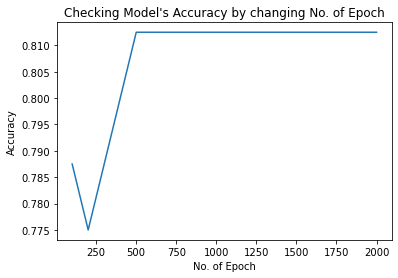

In [72]:
no_of_epoch = [100, 200, 500, 1000, 2000]
score_epoch = [score2, score1, score3, score4, score5]
plt.plot(no_of_epoch, score_epoch)
plt.title("Checking Model's Accuracy by changing No. of Epoch")
plt.xlabel("No. of Epoch")
plt.ylabel("Accuracy")
plt.show()

From the above figure, we can see that, increasing no. of epoch will not always give better accuracy 

## By Changing Learning Rate

### Model 6: Learning Rate: 0.001

In [73]:
# create the model baseline
def create_baseline(n_h = 4, lr = 0.001):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers

    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model   
model = create_baseline()
# model.summary()

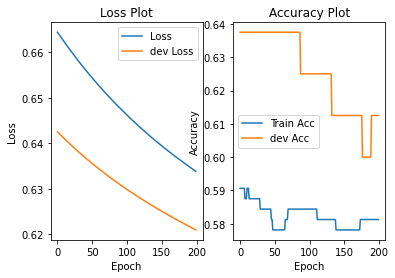

In [74]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

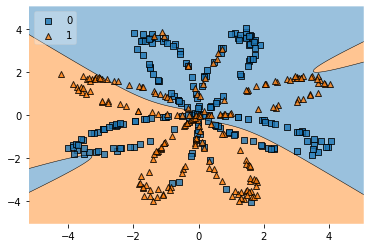

In [75]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y[:,0], clf=model, legend=2)
plt.show()

In [76]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score6 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score6)

[[26 16]
 [15 23]]
Overall Accuracy: 0.6125


### Model 7: Learning Rate: 0.05 

In [77]:
# create the model baseline
def create_baseline(n_h = 4, lr = 0.05):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers
    
    
    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model 
model = create_baseline()
# model.summary()

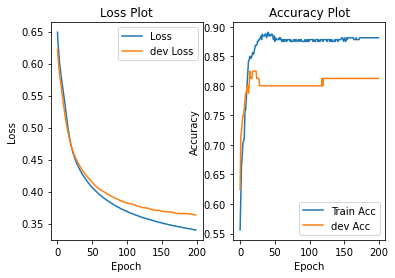

In [78]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

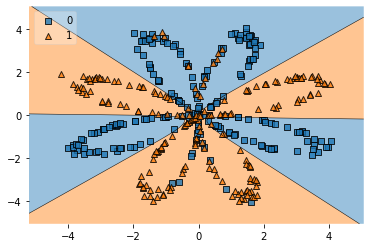

In [79]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y[:,0], clf=model, legend=2)
plt.show()

In [80]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score7 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score7)

[[41  1]
 [14 24]]
Overall Accuracy: 0.8125


### Model 8: Learning Rate: 0.1 

In [81]:
# create the model baseline
def create_baseline(n_h = 4, lr = 0.1):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers
    
    
    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model   
model = create_baseline()
# model.summary()

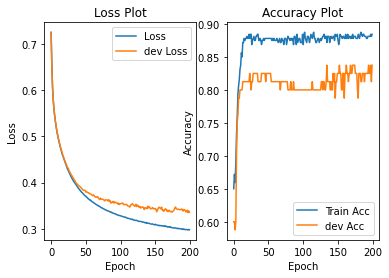

In [82]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

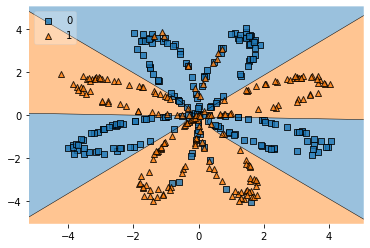

In [83]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y[:,0], clf=model, legend=2)
plt.show()

In [84]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score8 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score8)

[[41  1]
 [12 26]]
Overall Accuracy: 0.8375


### Model 9: Learning Rate: 0.5

In [85]:
# create the model baseline
def create_baseline(n_h = 4, lr = 0.5):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers
    
    
    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model 
model = create_baseline()
# model.summary()

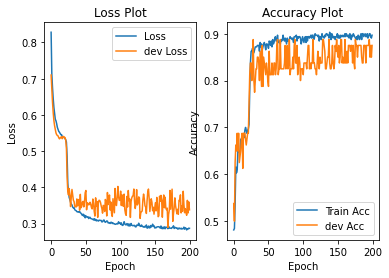

In [86]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

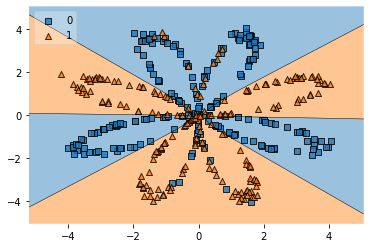

In [87]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X, Y[:,0], clf=model, legend=2)
plt.show()

In [88]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score9 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score9)

[[41  1]
 [ 9 29]]
Overall Accuracy: 0.875


### Comparison on changing Learning Rate

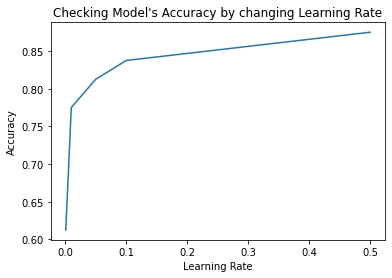

In [89]:
learning_rate = [0.001, 0.01, 0.05, 0.1, 0.5]
score_lr = [score6, score1, score7, score8, score9]
plt.plot(learning_rate, score_lr)
plt.title("Checking Model's Accuracy by changing Learning Rate")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.show()

Basically, if learning rate is set too low, training will progress very slowly as it makes very tiny updates to the weights. However, if learning rate is set too high, it can cause undesirable divergent behavior in the loss function. <b>Interestingly</b>, for this dataset, we got higher accuracy for increasing the learning rate to 0.5 

## By Changing the no. of Hidden Units
1, 2, 3, 4, 5, 10, 50

### Model 10: No. of Hidden Units: 1

In [93]:
# create the model baseline
def create_baseline(n_h = 1, lr = 0.05):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers

    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model   
model = create_baseline()
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


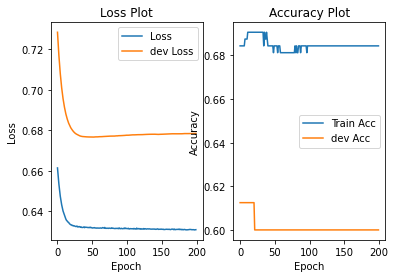

In [94]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [96]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score10 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score10)

[[27 15]
 [17 21]]
Overall Accuracy: 0.6


### Model 11: No. of Hidden Units: 2

In [97]:
# create the model baseline
def create_baseline(n_h = 2, lr = 0.05):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers

    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model   
model = create_baseline()
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 3         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


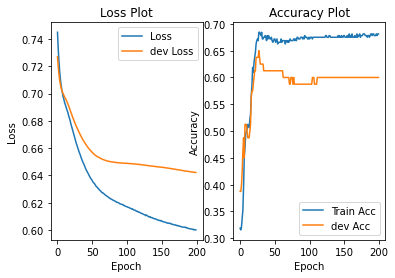

In [98]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [99]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score11 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score11)

[[27 15]
 [17 21]]
Overall Accuracy: 0.6


### Model 12: No. of Hidden Units: 3

In [100]:
# create the model baseline
def create_baseline(n_h = 3, lr = 0.05):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers

    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model   
model = create_baseline()
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 3)                 9         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


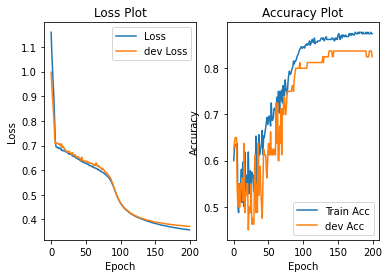

In [101]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [102]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score12 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score12)

[[40  2]
 [12 26]]
Overall Accuracy: 0.825


### Model 13: No. of Hidden Units: 5

In [103]:
# create the model baseline
def create_baseline(n_h = 5, lr = 0.05):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers

    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model   
model = create_baseline()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 6         
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


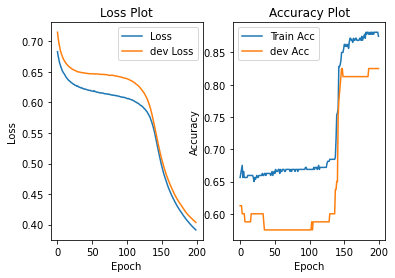

In [104]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [105]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score13 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score13)

[[41  1]
 [13 25]]
Overall Accuracy: 0.825


### Model 14: No. of Hidden Units: 10

In [106]:
# create the model baseline
def create_baseline(n_h = 10, lr = 0.05):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers

    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model   
model = create_baseline()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 11        
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


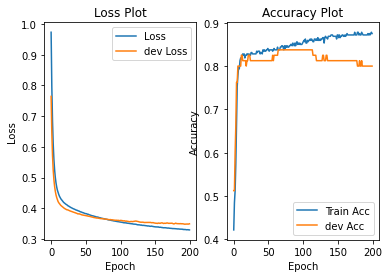

In [107]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [108]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score14 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score14)

[[41  1]
 [15 23]]
Overall Accuracy: 0.8


### Model 15: No. of Hidden Units: 50

In [109]:
# create the model baseline
def create_baseline(n_h = 50, lr = 0.05):
    # initializers
    initializer = tf.keras.initializers.RandomNormal(mean=0,stddev=1)
    
    model = tf.keras.models.Sequential()
    # Input layer and first hidden layer
    model.add(
        tf.keras.layers.Dense(units = n_h, 
              activation = 'tanh', 
              input_shape = (x_train.shape[1],),
             kernel_initializer=initializer)
    )
    
    # Extra hidden layers

    # Output
    model.add(
        tf.keras.layers.Dense(units = 1, activation = 'sigmoid', kernel_initializer= initializer)
    )
    
    # what kind of loss function and metrics should have the neural network? Any optimizer?
    opt = tf.keras.optimizers.SGD(lr = lr)
    #loss = tf.keras.losses.binary_crossentropy()
    model.compile(loss='binary_crossentropy', optimizer= opt, metrics=['accuracy'])
    return model   
model = create_baseline()
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 50)                150       
_________________________________________________________________
dense_35 (Dense)             (None, 1)                 51        
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


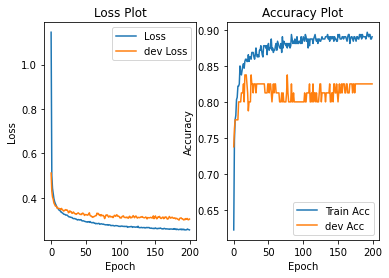

In [110]:
history = model.fit(
    x_train, y_train[:,0], validation_data=(x_test,y_test), epochs = 200, verbose = 0
)
plt.subplot(1, 2, 1)
plt.title("Loss Plot")
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='dev Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.title("Accuracy Plot")
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'],label = 'dev Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [111]:
predictions = model.predict(x_test)
predictions2 = (predictions > 0.5)*1
y_true = list(y_test)
y_pred = list(predictions2)
print(confusion_matrix(y_true, y_pred, labels=[1,0]))
score15 = accuracy_score(y_true, y_pred)
print("Overall Accuracy:", score15)

[[41  1]
 [13 25]]
Overall Accuracy: 0.825


### Comparison on changing No. of Hidden Units

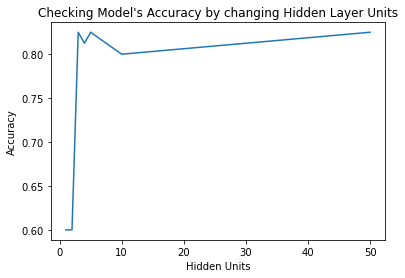

In [112]:
hidden_units = [1, 2, 3, 4, 5, 10, 50]
score_hu = [score10, score11, score12, score7, score13, score14, score15]
plt.plot(hidden_units, score_hu)
plt.title("Checking Model's Accuracy by changing Hidden Layer Units")
plt.xlabel("Hidden Units")
plt.ylabel("Accuracy")
plt.show()

## Findings:
- As long as validation error is decreasing, more epochs are beneficial, model is improving on seen (training) and unseen (validation) data.

- As soon as validation error starts to increase, it signals that model is over-fitting on training data, thus the learning process should be stopped. 